In [2]:
import pandas as pd
df = pd.read_csv("laptop_price.csv", sep = ',', encoding= 'windows-1258')
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


1.1 Изучите количество памяти с помощью matplotlib
1.2 Изучите стоимость ноутбуков с помощью matplotlib
1.3 Изучите вес ноутбуков с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [3]:
import matplotlib.pyplot as pl
import seaborn as sns

In [4]:
df['Memory_type'] = df['Memory'].apply(lambda x: x.split(" ")[1])
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD


In [5]:
def memory(memory_str):
    gb=memory_str.split(' ')[0]
    if gb.endswith('GB'):
        gb=float(gb[:-2])
    elif gb.endswith('TB'):
        gb=float(gb[:-2])*1024
    return gb

df['Memory_Amount']=df['Memory'].apply(memory)
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_type,Memory_Amount
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,128.0


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]),
 [Text(-250.0, 0, '−250'),
  Text(0.0, 0, '0'),
  Text(250.0, 0, '250'),
  Text(500.0, 0, '500'),
  Text(750.0, 0, '750'),
  Text(1000.0, 0, '1000'),
  Text(1250.0, 0, '1250'),
  Text(1500.0, 0, '1500'),
  Text(1750.0, 0, '1750'),
  Text(2000.0, 0, '2000'),
  Text(2250.0, 0, '2250')])

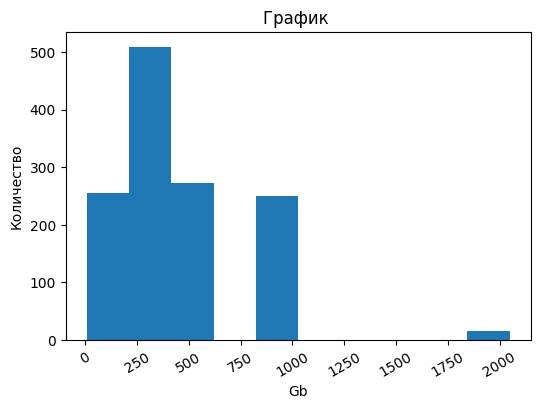

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(df['Memory_Amount'])
plt.title("График ")
plt.xlabel("Gb")
plt.ylabel("Количество")
plt.xticks(rotation=30)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

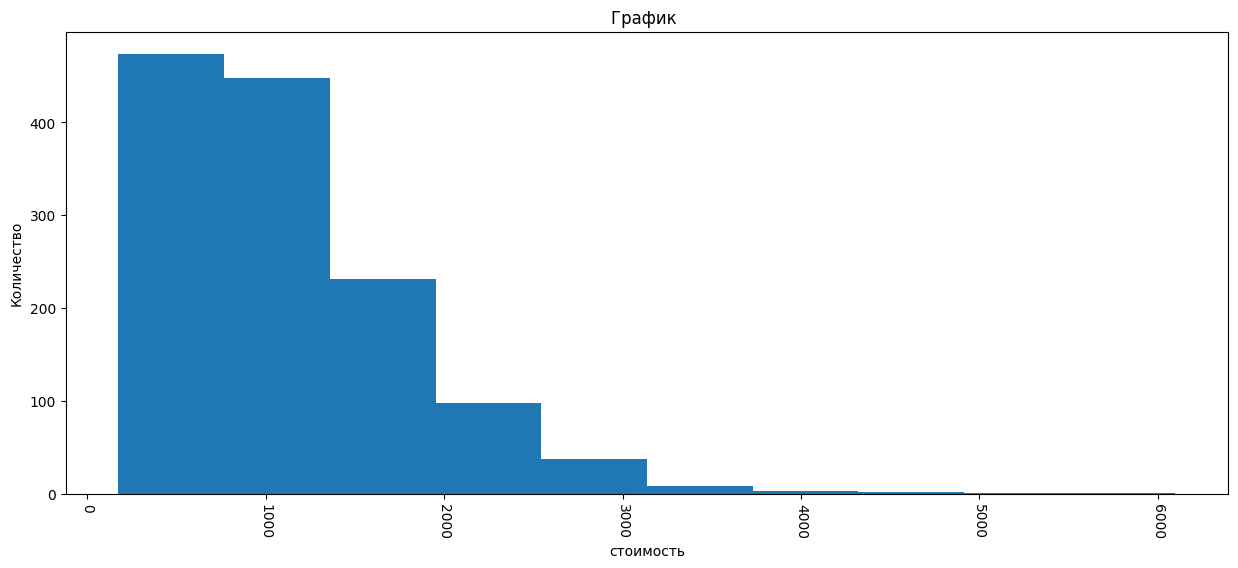

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.hist(df['Price_euros'])
plt.title("График ")
plt.xlabel("стоимость")
plt.ylabel("Количество")
plt.xticks(rotation=-90)

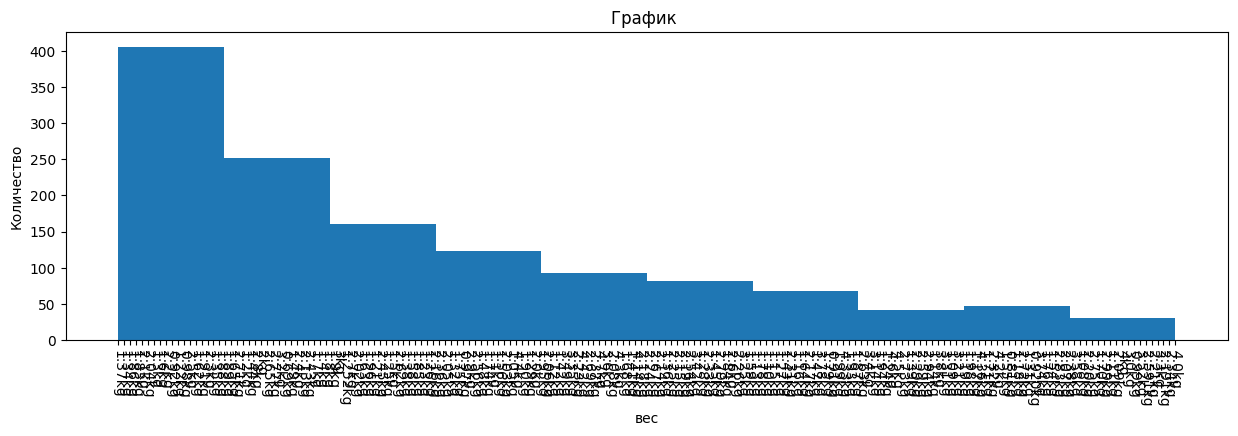

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.hist(df['Weight'])
plt.title("График ")
plt.xlabel("вес")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

2.1 Изучите распределение типов носителя
2.2 Изучите распределение компаний производителей
2.3 Изучите распределение операционной системы
2.4 Изучите распределение компаний производителей CPU

In [12]:
data=df['Memory_type'].value_counts()
data

Memory_type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

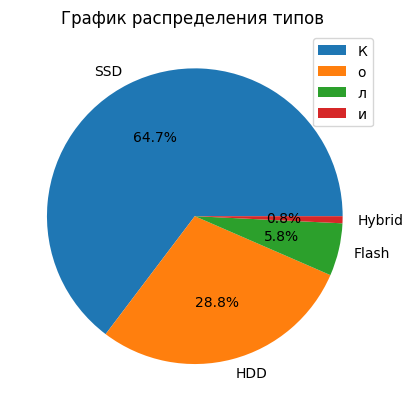

In [13]:
plt.pie(data.values, autopct='%.1f%%', labels=data.index)
plt.title("График распределения типов ")
plt.legend("Количество")

In [18]:
data1=df['Company'].value_counts()
data1

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

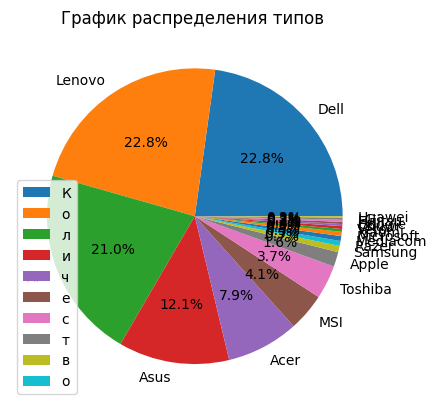

In [20]:
plt.pie(data1.values, autopct='%.1f%%', labels=data1.index)
plt.title("График распределения типов ")
plt.legend("Количество")

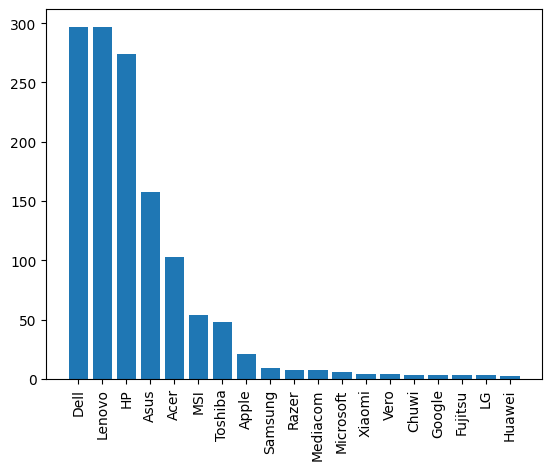

In [19]:
plt.bar(data1.index,data1.values)
plt.xticks(rotation=90);

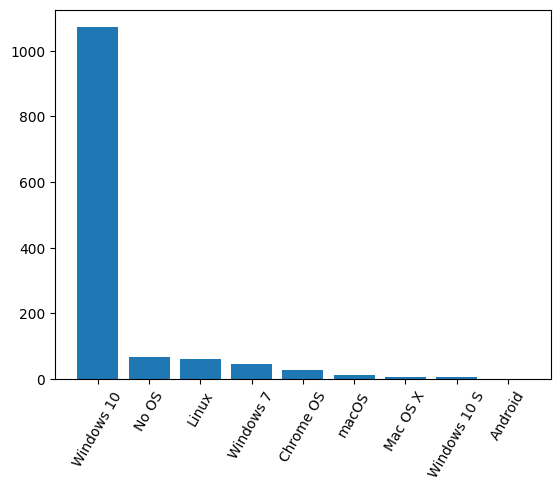

In [15]:
plt.bar((df['OpSys'].value_counts()).index, (df['OpSys'].value_counts()).values)
plt.xticks(rotation= 60);

In [25]:
data2=df['OpSys'].value_counts()
data2

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Windows 10'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Linux'),
  Text(3, 0, 'Windows 7'),
  Text(4, 0, 'Chrome OS'),
  Text(5, 0, 'macOS'),
  Text(6, 0, 'Mac OS X'),
  Text(7, 0, 'Windows 10 S'),
  Text(8, 0, 'Android')])

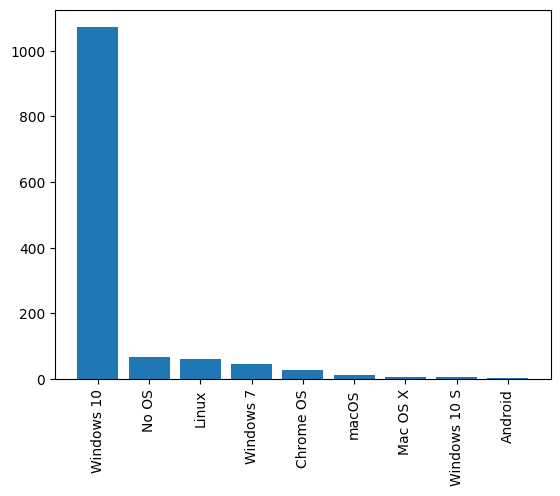

In [26]:
plt.bar(data2.index,data2.values)
plt.xticks(rotation=90)

In [36]:
df["Cpu_Company"]=df["Cpu"].apply(lambda x: x.split(" ")[0])
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_type,Memory_Amount,Memory_Type,Cpu_Company
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,128.0,SSD,Intel


In [37]:
data3=df['Cpu_Company'].value_counts()
data3

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

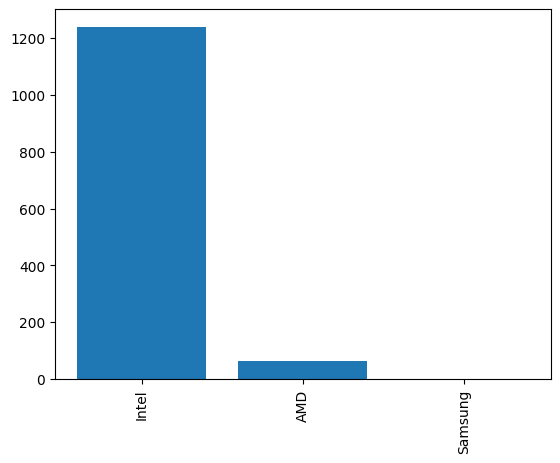

In [38]:
plt.bar(data3.index,data3.values)
plt.xticks(rotation=90);

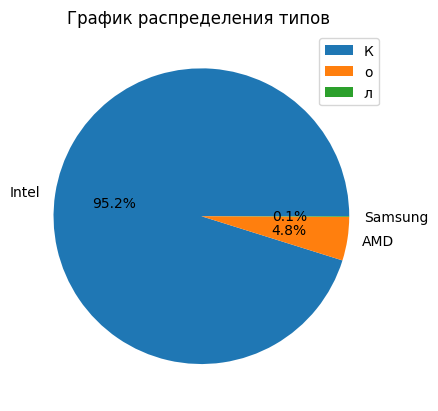

In [39]:
plt.pie(data3.values, autopct='%.1f%%', labels=data3.index)
plt.title("График распределения типов ")
plt.legend("Количество")

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

3.1 Постройте график в абсолютных величинах
3.2 Постройте график в относительных величинах

In [41]:
data4=pd.crosstab(index=df['Company'],columns=df['Cpu_Company']).reset_index()
data4=data4.drop(columns=['Samsung']).reset_index()
data4

Cpu_Company,index,Company,AMD,Intel
0,0,Acer,10,93
1,1,Apple,0,21
2,2,Asus,11,147
3,3,Chuwi,0,3
4,4,Dell,0,297
5,5,Fujitsu,0,3
6,6,Google,0,3
7,7,HP,25,249
8,8,Huawei,0,2
9,9,LG,0,3


In [42]:
import numpy as np

([<matplotlib.axis.XTick at 0x1c34763ebc0>,
 [Text(0, 0, 'Acer'),
  Text(1, 0, 'Apple'),
  Text(2, 0, 'Asus'),
  Text(3, 0, 'Chuwi'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Fujitsu'),
  Text(6, 0, 'Google'),
  Text(7, 0, 'HP'),
  Text(8, 0, 'Huawei'),
  Text(9, 0, 'LG'),
  Text(10, 0, 'Lenovo'),
  Text(11, 0, 'MSI'),
  Text(12, 0, 'Mediacom'),
  Text(13, 0, 'Microsoft'),
  Text(14, 0, 'Razer'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Toshiba'),
  Text(17, 0, 'Vero'),
  Text(18, 0, 'Xiaomi')])

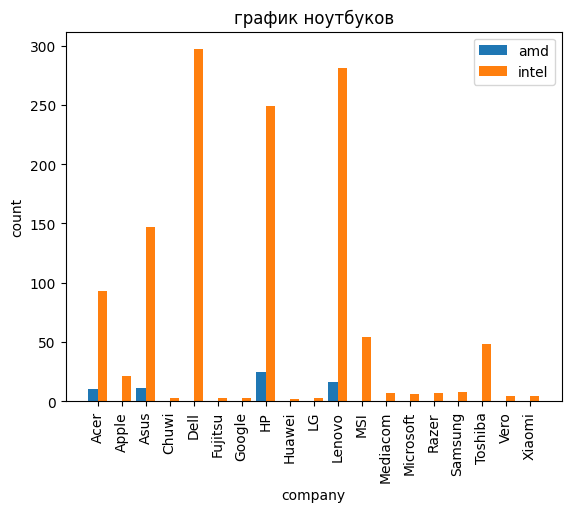

In [43]:
n_ticks = np.arange(len(data4['AMD']))
offset = 0.2
w = 0.4
plt.bar(n_ticks-offset,data4['AMD'],width=w)
plt.bar(n_ticks+offset,data4['Intel'],width=w)
plt.title('график ноутбуков')
plt.xlabel('company')
plt.ylabel('count')
plt.legend(['amd','intel'])
plt.xticks(n_ticks,data4['Company'],rotation=90)